In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pymongo import MongoClient
import flask
from pprint import pprint

In [95]:
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.palettes import Category20c
from math import pi

In [97]:
mongo = MongoClient(port=27017)

In [99]:
db = mongo['projectdb']

In [101]:
print(db.list_collection_names())

['mycollection']


In [103]:
print(db.mycollection.find_one())

{'_id': ObjectId('6711b143e0b05b632a78cbb9'), 'artist': 'britney spears', 'song': 'oops!...i did it again', 'duration_ms': 211160, 'explicit': 'False', 'year': 2000, 'popularity': 77, 'danceability': 77.02564102564102, 'energy': 83.48348348348348, 'key': 1, 'loudness': -5.444, 'mode': 0, 'speechiness': 7.586805555555556, 'acousticness': 33.59462486002239, 'instrumentalness': 1.77e-05, 'liveness': 41.61781946072685, 'valence': 91.88078108941419, 'tempo': 95.053, 'genre': 'pop', 'duration_minutes': 3.519333333333333}


In [105]:
collection = db['mycollection']

In [107]:
data = collection.find()

In [109]:
spotify_df = pd.DataFrame(list(data))

In [111]:
x_field = 'danceability'

In [113]:
y_field = 'energy'

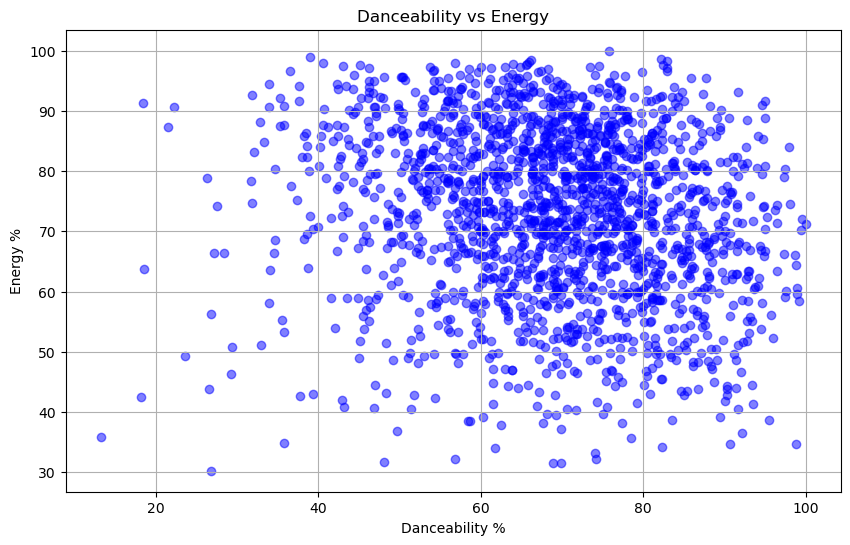

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(spotify_df[x_field], spotify_df[y_field], color='blue', alpha=0.5)
plt.title('Danceability vs Energy')
plt.xlabel('Danceability %')
plt.ylabel('Energy %')
plt.grid(True)

# Step 7: Show the plot
plt.show()


In [117]:
from bokeh.plotting import output_notebook
output_notebook()

Loading BokehJS ...

In [119]:
genre_counts = spotify_df['genre'].value_counts().reset_index()
genre_counts

,genre,count
0,pop,872
1,hip hop,719
2,rock,153
3,Dance/Electronic,38
4,latin,14
5,R&B,11
6,World/Traditional,9
7,country,9
8,metal,8
9,Folk/Acoustic,4


In [121]:
genre_counts.columns = ['genre', 'count']

In [123]:
genre_counts['angle'] = genre_counts['count'] / genre_counts['count'].sum() * 2 * pi
genre_counts['color'] = Category20c[len(genre_counts)]

In [125]:
p = figure(outer_height=350, title="Song Genres Distribution", toolbar_location=None,
           tools="hover", tooltips="@genre: @count", x_range=(-0.5, 1.0))

In [127]:
p.wedge(x=0, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True),
         end_angle=cumsum('angle'), line_color="white", fill_color='color', legend_field='genre', source=genre_counts)

GlyphRenderer(id='p1148', ...)

In [129]:
p.circle(x=0, y=1, radius=0.2, color="white")

GlyphRenderer(id='p1161', ...)

In [131]:
p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)